<a href="https://colab.research.google.com/github/ryosuke1224-haas/cluster_choice_of_k/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering & Choice of K**

In [121]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

URL transformed to HTTPS due to an HSTS policy
File ‘yelp_reviewers.zip’ already there; not retrieving.

Archive:  yelp_reviewers.zip
Dataset Downloaded: yelp_reviewers.csv
                q3           q4  ...        q16ab        q16ac
count  7177.000000  7177.000000  ...  7177.000000  7177.000000
mean      6.838651     5.281455  ...     1.127751     3.649254
std       7.597977    16.208703  ...     4.652206     0.977100
min       1.000000     1.000000  ...     0.000000     1.000000
25%       3.000000     1.000000  ...     0.000000     3.200000
50%       5.000000     2.000000  ...     0.500000     3.777778
75%       9.000000     4.000000  ...     1.307692     4.333333
max     252.000000   607.000000  ...   342.300000     5.000000

[8 rows x 40 columns]
....SETUP COMPLETE....


In [122]:
#Check the data set
df.head()

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,7,510.00,0,0.000000,0.000000,3.000,0.013725,0.000000,0,0,0,0.000,0,0,3.0,0.000,0.00,0.0,0.000000,3,experienced,no,0.000,13,3,0.000000,101.000000,0,0,NaN,3.000
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10,132.00,0,0.000000,0.000000,1.000,0.045455,0.000000,1,1,0,0.000,0,0,0.0,0.000,1.00,0.0,0.000000,1,experienced,no,0.000,35,1,0.007576,23.000000,0,0,0.0,1.000
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,9,1792.00,0,0.000000,0.000000,3.000,0.027344,0.000000,1,1,0,0.000,0,0,12.0,1.000,1.00,1.0,0.000000,3,experienced,no,2.000,36,3,0.001685,363.000000,0,0,NaN,3.000
24699,8GHUeOm807bI5Qh4X3CHBA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,8,283.00,0,0.000000,0.000000,5.000,0.017668,0.000000,0,0,0,0.000,0,0,1.0,0.000,0.00,0.0,0.000000,5,experienced,no,0.000,33,5,0.000000,50.000000,0,0,2.0,5.000
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,0.69,0.0,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875,0.022989,0.330719,2,6,0,1.375,1,0,4.5,0.125,0.75,1.0,0.192489,5,experienced,no,0.375,8,39,0.001755,91.072917,4,0,1.0,4.875


---

In [123]:
#Create a function to return silhouette scores for different choice of K for cluster with q4-6
def silhouette(df):
    x=df
    x=x.dropna()
    n_cluster=[]
    scores=[]
    for i in range(2,9):
      kmeans = KMeans(n_clusters=i, random_state=42)
      kmeans.fit(x)
      score = silhouette_score(x, kmeans.labels_)
      n_cluster.append(i)
      scores.append(score)
    silhouette_scores=pd.DataFrame({'n_cluster':n_cluster,
                                   'scores':scores
                                    })
    return silhouette_scores
    raise NotImplementedError()

print(silhouette(df[['q4','q5','q6']]))

   n_cluster    scores
0          2  0.986346
1          3  0.979123
2          4  0.956106
3          5  0.875233
4          6  0.873373
5          7  0.786985
6          8  0.752025


In [124]:
print(silhouette(df[['q11','q12','q13']]))

   n_cluster    scores
0          2  0.486268
1          3  0.540761
2          4  0.600600
3          5  0.584042
4          6  0.615869
5          7  0.639202
6          8  0.656855


In [125]:
#Create a function to list the number of data points in the cluster
def datapoints(df,k):
    x=df
    x=x.dropna()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    return dict(sorted(collections.Counter(kmeans.labels_).items()))
    raise NotImplementedError()

print(datapoints(df[['q11','q12','q13']],8))

{0: 3307, 1: 1632, 2: 2862, 3: 9848, 4: 5723, 5: 3405, 6: 1192, 7: 2140}


In [126]:
#Create a function to list cluster centers of each cluster
def clustercenters(df,k):  
    x=df
    x=x.dropna()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    return kmeans.cluster_centers_
    raise NotImplementedError()
print(clustercenters(df[['q11','q12','q13']],8))

[[10.02046238 23.16876398 66.81187972]
 [ 1.13148897 98.30148897  0.56707721]
 [50.52725559  2.37334497 47.09952514]
 [ 0.303684    0.21966186 99.47663079]
 [31.44817308 30.39612587 38.15302273]
 [28.36471366  3.86088106 67.77426138]
 [98.88163591  0.93032718  0.18802852]
 [ 3.69567555 52.25672744 44.04774661]]


Cluster the dataset using $k = 5$ and using features q7-q15 and check the average of q3

In [127]:
#create a function to check average of specific column
def average_number(df,k,q):
    x=df.dropna().copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x.drop(q,axis=1))
    x['cluster_id']=kmeans.predict(x.drop(q,axis=1))
    q_average=x[[q,'cluster_id']].groupby('cluster_id').mean()
    return q_average
    raise NotImplementedError()

In [128]:
print(np.round_(average_number(df[['q3','q7','q8','q9','q10','q11','q12','q13','q14','q15']],5,'q3'), decimals=1, out=None))

             q3
cluster_id     
0           7.3
1           4.9
2           6.6
3           2.4
4           6.9




#### Data Cleansing and Normalization ####
Cluster the dataset using all features in the dataset

In [129]:
# df.isnull().sum()

In [130]:
#drop q8 & q9 because they have a lot of null values. 
df1=df.drop(['q8','q9'],axis=1)
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19582 entries, 47453 to 107905
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  19582 non-null  object 
 1   q3       19582 non-null  int64  
 2   q4       19582 non-null  int64  
 3   q5       19582 non-null  int64  
 4   q6       19582 non-null  int64  
 5   q7       19582 non-null  float64
 6   q10      19582 non-null  float64
 7   q11      19582 non-null  float64
 8   q12      19582 non-null  float64
 9   q13      19582 non-null  float64
 10  q14      19582 non-null  int64  
 11  q15      19582 non-null  float64
 12  q16a     19582 non-null  int64  
 13  q16b     19582 non-null  float64
 14  q16c     19582 non-null  float64
 15  q16d     19582 non-null  float64
 16  q16e     19582 non-null  float64
 17  q16f     19582 non-null  float64
 18  q16g     19582 non-null  int64  
 19  q16h     19582 non-null  int64  
 20  q16i     19582 non-null  int64  
 21  q16j   

By removing two features, it could double the number of rows remaining. Now preprocess categorical variables into dummy values.

In [131]:
q16s_dummy = pd.get_dummies(df1['q16s'],prefix='q16s').reset_index(drop=True)
q16t_dummy = pd.get_dummies(df1['q16t'],prefix='q16t').reset_index(drop=True)

In [132]:
# Normalize the remaining values (I used vector normalization here)
from sklearn import preprocessing
df1=df1.drop(['user_id','q16s','q16t'],axis=1)
df1_normalized = pd.DataFrame(preprocessing.normalize(df1,axis=0))
df1_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.008138,0.001381,0.000803,0.004257,0.010570,0.011346,0.005263,0.002901,0.007022,0.008356,0.005308,0.015727,0.002114,0.001691,0.009366,0.004971,0.002362,0.00496,0.010026,0.0,0.002537,0.004500,0.00000,0.004677,0.001080,0.008286,0.008602,0.002634,0.009490,0.003701,0.002142,0.010429,0.001592,0.007166,0.024797,0.000000,0.001877,0.009366
1,0.002035,0.000690,0.000803,0.001064,0.003506,0.003764,0.007237,0.007980,0.004828,0.008356,0.004260,0.000000,0.008456,0.003063,0.005763,0.005279,0.007142,0.00000,0.000000,0.0,0.003691,0.004500,0.00000,0.005716,0.000000,0.000000,0.000000,0.002805,0.003796,0.009870,0.005891,0.001605,0.000000,0.003659,0.000000,0.015082,0.000000,0.005763
2,0.001017,0.000000,0.000000,0.000532,0.000000,0.000000,0.000000,0.000000,0.009655,0.004178,0.016146,0.000000,0.000000,0.000404,0.009606,0.005786,0.000000,0.00496,0.001671,0.0,0.001845,0.000000,0.00000,0.012472,0.000000,0.011048,0.008602,0.000678,0.009490,0.009870,0.009908,0.001337,0.000451,0.015500,0.000000,0.000000,0.000000,0.009606
3,0.005086,0.000000,0.000000,0.002128,0.008182,0.007582,0.000000,0.000000,0.009655,0.005014,0.010428,0.003932,0.010005,0.000501,0.006916,0.004479,0.010689,0.00744,0.005013,0.0,0.001476,0.009001,0.00000,0.013303,0.008641,0.006629,0.003441,0.001184,0.009490,0.013818,0.003749,0.004814,0.001432,0.013140,0.006199,0.000000,0.002347,0.006916
4,0.008138,0.005523,0.004017,0.006917,0.010570,0.013965,0.008908,0.006138,0.004828,0.007521,0.008381,0.007864,0.007664,0.002531,0.007204,0.006657,0.008563,0.00744,0.013368,0.0,0.005998,0.000000,0.00000,0.005716,0.009721,0.011048,0.002151,0.001882,0.009490,0.004935,0.000803,0.008023,0.008946,0.007204,0.006199,0.065356,0.007509,0.007204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,0.006104,0.000690,0.001607,0.001064,0.009096,0.003764,0.005790,0.012767,0.003862,0.007521,0.017863,0.003932,0.009764,0.000304,0.005123,0.006021,0.010647,0.00000,0.005013,0.0,0.001538,-0.004500,0.03719,0.007795,0.011521,0.005524,0.018638,0.000229,0.001898,0.011515,0.002678,0.004279,0.001167,0.028555,0.000000,0.000000,0.004693,0.005123
19578,0.003052,0.000690,0.001607,0.004257,0.005590,0.011346,0.002631,0.005803,0.007022,0.007521,0.006251,0.000000,0.003452,0.003828,0.008325,0.007933,0.003367,0.00248,0.003342,0.0,0.006766,0.009001,0.00000,0.004850,0.000000,0.007365,0.000000,0.008426,0.007592,0.006580,0.006695,0.003476,0.002736,0.004730,0.006199,0.000000,0.002503,0.008325
19579,0.019328,0.001381,0.001607,0.003725,0.014940,0.010637,0.005263,0.005803,0.006145,0.009192,0.002039,0.003932,0.010132,0.001853,0.006269,0.007144,0.011780,0.00744,0.018382,0.0,0.001068,0.018002,0.03719,0.001039,0.004548,0.006396,0.000000,0.003591,0.009490,0.003117,0.003214,0.016580,0.017092,0.003239,0.000000,0.015082,0.000939,0.006269
19580,0.008138,0.000000,0.000803,0.002660,0.010570,0.008782,0.000000,0.005321,0.008046,0.006685,0.002403,0.011795,0.008109,0.002037,0.007444,0.005129,0.009061,0.00496,0.000000,0.0,0.001384,0.000000,0.00000,0.000520,0.001080,0.000000,0.000000,0.001876,0.007592,0.002467,0.009105,0.008290,0.000000,0.002836,0.000000,0.000000,0.000653,0.007444


In [133]:
df1_normalized=pd.concat([df1_normalized,q16s_dummy,q16t_dummy],axis=1)

In [134]:
df1

,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
50079,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,2232.67,1,1.632993,0.000373,2.666667,0.027844,1.490712,0,3,0,0.833333,-1,1,7.500000,1.333333,0.500000,2.166667,0.016740,1,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667
69511,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,781.33,0,0.577350,0.004693,4.333333,0.036689,0.471405,1,2,0,3.666667,2,0,4.666667,0.000000,0.666667,0.000000,0.615856,4,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333
77193,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,254.89,1,1.694504,0.002271,3.263158,0.033037,1.649309,3,11,0,0.578947,4,1,1.000000,0.526316,0.578947,0.000000,0.262505,5,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158
88687,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,300.38,3,1.356203,0.002497,3.875000,0.023720,1.268611,2,0,0,0.750000,0,0,0.500000,0.125000,0.000000,0.000000,0.137155,4,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000


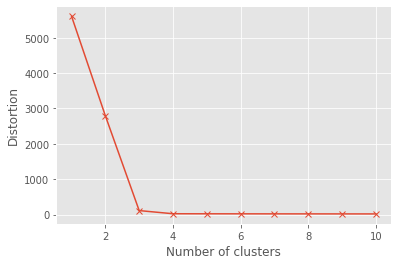

In [135]:
# check the best k with the elbow method 
distortions = []

for i  in range(1,11):          
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(df1_normalized)                      
    distortions.append(km.inertia_) 

plt.plot(range(1,11),distortions,marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [136]:
# Which customers's reviews should each businesses focus on when they try to find points for improvements
x=df[['q3','q4','q5','q6','q16j','q16ac']]
x=x.dropna()
x_normalized = preprocessing.normalize(x,axis=0)

n_cluster=[]
scores=[]
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(x_normalized)
  score = silhouette_score(x_normalized, kmeans.labels_)
  n_cluster.append(i)
  scores.append(score)
      
silhouette_scores=pd.DataFrame({'n_cluster':n_cluster,'scores':scores})
silhouette_scores

,n_cluster,scores
0,2,0.966733
1,3,0.946290
2,4,0.691362
3,5,0.650573
4,6,0.587346
5,7,0.505515
6,8,0.489842


In [137]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_normalized)
x['cluster_id']=kmeans.predict(x_normalized)
x.groupby('cluster_id').mean()

,q3,q4,q5,q6,q16j,q16ac
cluster_id,,,,,,
0,3.165140,1.022222,0.908681,2.229785,1.079589,3.595200
1,30.350877,191.052632,162.105263,221.947368,36.069791,3.879951


reviewers assingned cluster_id 0 write more reviews and more votes. so the are kind of influener type. thus, each business should focus more on their opition

In [138]:

!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
print('Dataset Downloaded: yelp_reviews.csv')
df_lastweek=pd.read_csv('yelp_reviews.csv')

URL transformed to HTTPS due to an HSTS policy
--2020-12-20 19:24:52--  https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376638166 (359M) [text/csv]
Saving to: ‘yelp_reviews.csv’

yelp_reviews.csv    100%[===================>] 359.19M  20.3MB/s    in 19s     

2020-12-20 19:25:11 (19.4 MB/s) - ‘yelp_reviews.csv’ saved [376638166/376638166]

Dataset Downloaded: yelp_reviews.csv


In [139]:
df_lastweek.head()

,type,business_id,user_id,stars,text,date,cool_votes,useful_votes,funny_votes
0,review,mxrXVZWc6PWk81gvOVNOUw,mv7shusL4Xb6TylVYBv4CA,4,Definitely try the duck dish. I rank it amon...,2011-06-13,0,0,0
1,review,mxrXVZWc6PWk81gvOVNOUw,0aN5QPhs-VwK2vusKG0waQ,5,Big Ass Burger was awesome! Great $5 mojitos. ...,2011-06-25,1,0,0
2,review,kK4AzZ0YWI-U2G-paAL7Fg,0aN5QPhs-VwK2vusKG0waQ,5,Unbelievable sandwiches! Good service.,2011-06-25,0,0,0
3,review,mxrXVZWc6PWk81gvOVNOUw,1JUwyYab-uJzEx_FRd81Zg,5,"Awesome, awesome, awesome! My mom and sister a...",2011-07-18,1,1,0
4,review,mxrXVZWc6PWk81gvOVNOUw,2Zd3Xy8hUVmZkNg7RyNjhg,4,I had the ribs they were great. The beer sele...,2011-07-19,1,0,1


In [140]:
#Aggregate cool, funny and useful votes for each business id
x=df_lastweek[['cool_votes','useful_votes','funny_votes','business_id']].groupby('business_id').sum() 
x.head()

,cool_votes,useful_votes,funny_votes
business_id,,,
--5jkZ3-nUPZxUvtcbr8Uw,4,3,3
--AKjxBmhm9DWrh-e0hTOw,0,0,0
--BlvDO_RG2yElKu9XA1_g,1,3,1
--Ol5mVSMaW8ExtmWRUmKA,0,1,0
--Y_2lDOtVDioX5bwF6GIw,0,4,0


In [141]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43317 entries, --5jkZ3-nUPZxUvtcbr8Uw to zzxb0YNkRvH1UgifuR3BvQ
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cool_votes    43317 non-null  int64
 1   useful_votes  43317 non-null  int64
 2   funny_votes   43317 non-null  int64
dtypes: int64(3)
memory usage: 1.3+ MB


In [142]:
from sklearn import preprocessing
x_normalized = pd.DataFrame(preprocessing.normalize(x)) #normalize the valiables

In [143]:
x_normalized.columns=[['cool_votes','useful_votes','funny_votes']]
x_normalized

,cool_votes,useful_votes,funny_votes
0,0.685994,0.514496,0.514496
1,0.000000,0.000000,0.000000
2,0.301511,0.904534,0.301511
3,0.000000,1.000000,0.000000
4,0.000000,1.000000,0.000000
...,...,...,...
43312,0.000000,1.000000,0.000000
43313,0.577350,0.577350,0.577350
43314,0.447214,0.894427,0.000000
43315,0.000000,1.000000,0.000000


In [144]:
#find the best K
n_cluster=[]
scores=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(x_normalized)
  score = silhouette_score(x_normalized, kmeans.labels_)
  n_cluster.append(i)
  scores.append(score)
      
silhouette_scores=pd.DataFrame({'n_cluster':n_cluster,'scores':scores})

In [145]:
silhouette_scores

,n_cluster,scores
0,2,0.609863
1,3,0.577413
2,4,0.621141
3,5,0.645778
4,6,0.645528
5,7,0.658144
6,8,0.671203
7,9,0.675886
8,10,0.692025


In [146]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_normalized)
pred=kmeans.predict(x_normalized)
x['cluster_id']=pred
x[['cool_votes','useful_votes','funny_votes','cluster_id']].groupby('cluster_id').mean()

,cool_votes,useful_votes,funny_votes
cluster_id,,,
0,0.000000,0.000000,0.000000
1,3.723651,16.250883,5.384266
2,1.456159,0.105428,0.093946
3,3.915437,9.530295,1.254215
4,8.266501,9.232046,8.530095
5,0.181304,3.753497,0.155492
6,3.651681,3.726610,0.589307
7,0.126354,0.172383,1.761733
8,29.389384,49.108536,25.345019


I see that business in cluster_id 8 receive a way moer votes compared to other clusters

In [147]:
x=x.reset_index()
x=x[['business_id','cluster_id']]
x

,business_id,cluster_id
0,--5jkZ3-nUPZxUvtcbr8Uw,4
1,--AKjxBmhm9DWrh-e0hTOw,0
2,--BlvDO_RG2yElKu9XA1_g,1
3,--Ol5mVSMaW8ExtmWRUmKA,5
4,--Y_2lDOtVDioX5bwF6GIw,5
...,...,...
43312,zzYURqVx-3W5STDMmh6oxw,5
43313,zzhykRiQh2FyrYEPMfBw0A,4
43314,zzknylIEbiITBePfIYjXfA,3
43315,zzrm5HEoYKEsfdi8XxSXuQ,5


In [148]:
df_lastweek2=pd.merge(df_lastweek,x, on ='business_id', how ='left')

In [149]:
df_lastweek2

,type,business_id,user_id,stars,text,date,cool_votes,useful_votes,funny_votes,cluster_id
0,review,mxrXVZWc6PWk81gvOVNOUw,mv7shusL4Xb6TylVYBv4CA,4,Definitely try the duck dish. I rank it amon...,2011-06-13,0,0,0,8
1,review,mxrXVZWc6PWk81gvOVNOUw,0aN5QPhs-VwK2vusKG0waQ,5,Big Ass Burger was awesome! Great $5 mojitos. ...,2011-06-25,1,0,0,8
2,review,kK4AzZ0YWI-U2G-paAL7Fg,0aN5QPhs-VwK2vusKG0waQ,5,Unbelievable sandwiches! Good service.,2011-06-25,0,0,0,6
3,review,mxrXVZWc6PWk81gvOVNOUw,1JUwyYab-uJzEx_FRd81Zg,5,"Awesome, awesome, awesome! My mom and sister a...",2011-07-18,1,1,0,8
4,review,mxrXVZWc6PWk81gvOVNOUw,2Zd3Xy8hUVmZkNg7RyNjhg,4,I had the ribs they were great. The beer sele...,2011-07-19,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...
547268,review,uJYw4p59AKh8c8h5yWMdOw,RbfDvjqqzzqT-ipvWWyPTg,2,Non smoking hotel room reeked of smoking.\nCar...,2016-07-06,0,1,0,8
547269,review,uJYw4p59AKh8c8h5yWMdOw,2K6zSLJy-zxLB7sqONfGvQ,3,Great location right on the strip but I defini...,2016-07-08,0,1,1,8
547270,review,9CLZ-Uwv3nmOlbbGCIhvrQ,2K6zSLJy-zxLB7sqONfGvQ,3,If you're staying in Planet Hollywood and look...,2016-07-08,0,1,0,8
547271,review,aGbjLWzcrnEx2ZmMCFm3EA,2K6zSLJy-zxLB7sqONfGvQ,4,I'm not a huge burger person but got dragged i...,2016-07-08,1,0,0,8


In [150]:
user_cluster_matrix=pd.crosstab(df_lastweek2['user_id'],df_lastweek2['cluster_id'])
user_cluster_matrix

cluster_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
--1Y03CEKR3WDbBjYnsW7A,0,0,0,0,0,1,0,0,0,0
--2QZsyXGz1OhiD4-0FQLQ,0,0,0,0,0,0,0,0,3,0
--82_AVgRBsLw6Dhy8sEnA,0,1,0,0,0,0,0,0,0,0
--8A9o_NeGyt_3kzlXtSdg,0,0,0,0,1,1,0,0,0,1
--8WbseBk1NjfPiZWjQ-XQ,0,0,0,1,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...
zzv762b871Wp3SVxsFQqHw,0,0,0,1,0,0,0,0,0,0
zzvflqB4xAcKFbIbS6HSOw,0,1,0,1,0,0,0,0,10,0
zzwu0nG0MCUP43zNSr5k-A,0,0,0,1,0,0,0,0,0,0
